# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On arriving at Mexico Airp...
1,✅ Trip Verified | I have flown British Airwa...
2,Not Verified | We bought tickets for a Geneva-...
3,✅ Trip Verified | Appalling service with fai...
4,✅ Trip Verified | British Airways charge you f...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Basic text preprocessing#

In [5]:
reviews = df['reviews'].str.split(pat="|", expand=True)

In [6]:
reviews

,0,1
0,✅ Trip Verified,On arriving at Mexico Airport we were told ...
1,✅ Trip Verified,I have flown British Airways for many years...
2,Not Verified,"We bought tickets for a Geneva-London flight,..."
3,✅ Trip Verified,Appalling service with failing defective fl...
4,✅ Trip Verified,British Airways charge you for the pleasure o...
...,...,...
995,✅ Trip Verified,London Heathrow to Austin. 10 hour flight in...
996,✅ Trip Verified,Mykonos to London flight delayed and waiting...
997,✅ Trip Verified,Johannesburg to Cape Town return. This flight...
998,✅ Trip Verified,Grenada to Gatwick. Having flown with BA on ...


In [7]:
df['reviews'] = reviews[1]

In [8]:
df.head()

,reviews
0,On arriving at Mexico Airport we were told ...
1,I have flown British Airways for many years...
2,"We bought tickets for a Geneva-London flight,..."
3,Appalling service with failing defective fl...
4,British Airways charge you for the pleasure o...


In [9]:
df['reviews']=df['reviews'].str.strip()

# Using wordcloud to check the frequency of the word in the dataset

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [11]:
textDict = """"""
for i in range(0, len(df['reviews'])):
    textDict+=(df['reviews'][i])

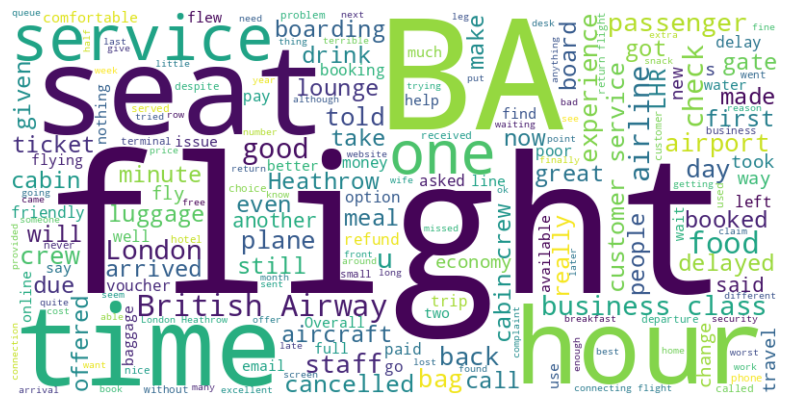

In [12]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textDict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Turn off axis labels
plt.show()

In [13]:
# calculating the length of words in the entity
df['word_count'] = df['reviews'].apply(lambda n: len(n.split()))

In [14]:
#converting each word to lowercase to deal with duplicate words
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
df.head()

,reviews,word_count
0,on arriving at mexico airport we were told tha...,419
1,i have flown british airways for many years an...,395
2,"we bought tickets for a geneva-london flight, ...",45
3,appalling service with failing defective fleet...,89
4,british airways charge you for the pleasure of...,256


In [26]:
#removing punctuation from the sentence
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '', regex=True)

In [27]:
df.head()

,reviews,word_count
0,on arriving at mexico airport we were told tha...,419
1,i have flown british airways for many years an...,395
2,we bought tickets for a genevalondon flight bu...,45
3,appalling service with failing defective fleet...,89
4,british airways charge you for the pleasure of...,256


In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thepresiding/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
df.head()

,reviews,word_count
0,flown airway many year still regularly. last f...,395
1,"bought ticket geneva-london flight, got airpor...",45
2,appalling failing defective fleet a380 aircraf...,89
3,airway charge pleasure choosing seat put back ...,256
4,wrong guys? people pay lot money class ticket ...,96


In [29]:
freq = pd.Series(' '.join(df['reviews']).split()).value_counts()

In [30]:
freq

flight        1985
ba            1257
service        731
time           542
london         478
              ... 
collapsing       1
panicky          1
names            1
thereby          1
1330hrs          1
Name: count, Length: 8078, dtype: int64

In [27]:
df.tail()

,reviews,word_count
995,"mykonos london delayed waiting depart. time, p...",59
996,johannesburg cape town return. operated comair...,444
997,grenada gatwick. flown aircraft type prior ref...,245
998,prague london. two hour 27th july delayed 3 ho...,54
999,london dubai. lately frequently flying premium...,74


In [31]:
#Spelling correction

from textblob import TextBlob
df['reviews'].apply(lambda x: str(TextBlob(x).correct()))

0      arriving mexico airport told flight delayed ai...
1      flown british always many years still regularl...
2      bought tickets genevalondon flight got airport...
3      appalling service failing defective fleet a380...
4      british always charge pleasure choosing seat p...
                             ...                        
995    london heathrow austin 10 hour flight being 74...
996    mykonos london flight delayed waiting depart t...
997    johannesburg cape town return flight operated ...
998    grenade patrick flown ba aircraft type prior r...
999    prague london two hour flight with july delaye...
Name: reviews, Length: 1000, dtype: object

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/thepresiding/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
#Lemmatization

from textblob import Word
df['reviews'] = df['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [50]:
#N-grams

nltk.download('punkt_tab')

TextBlob(df['reviews'][0]).ngrams(2)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/thepresiding/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[WordList(['arriving', 'mexico']),
 WordList(['mexico', 'airport']),
 WordList(['airport', 'told']),
 WordList(['told', 'flight']),
 WordList(['flight', 'delayed']),
 WordList(['delayed', 'aircraft']),
 WordList(['aircraft', 'broken']),
 WordList(['broken', 'replacement']),
 WordList(['replacement', 'aircraft']),
 WordList(['aircraft', 'lhr']),
 WordList(['lhr', 'six']),
 WordList(['six', 'hour']),
 WordList(['hour', 'late']),
 WordList(['late', 'eventually']),
 WordList(['eventually', 'managed']),
 WordList(['managed', 'check']),
 WordList(['check', 'told']),
 WordList(['told', 'contrary']),
 WordList(['contrary', 'ba']),
 WordList(['ba', 'website']),
 WordList(['website', 'could']),
 WordList(['could', 'access']),
 WordList(['access', '24hour']),
 WordList(['24hour', 'grand']),
 WordList(['grand', 'lounge']),
 WordList(['lounge', 'elite']),
 WordList(['elite', 'instead']),
 WordList(['instead', 'would']),
 WordList(['would', 'use']),
 WordList(['use', 'american']),
 WordList(['americ

In [63]:
#Term frequency

tf1 = (df['reviews']).apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis=0).reset_index()
tf1.columns = ['words', 'tf']

In [66]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['reviews'].str.contains(word)])))

In [68]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,flight,2269.0,0.205795,466.948658
1,told,294.0,1.754464,515.812323
2,u,432.0,0.002002,0.864865
3,would,389.0,1.309333,509.330661
4,hour,612.0,0.926341,566.920733
...,...,...,...,...
7371,grenada,1.0,6.907755,6.907755
7372,suppose,1.0,3.411248,3.411248
7373,entertaining,1.0,6.907755,6.907755
7374,timely,1.0,6.907755,6.907755


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df['reviews'])

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df['reviews'])

In [82]:
print(train_bow)

  (np.int32(0), np.int32(84))	1
  (np.int32(0), np.int32(551))	3
  (np.int32(0), np.int32(46))	2
  (np.int32(0), np.int32(895))	6
  (np.int32(0), np.int32(362))	7
  (np.int32(0), np.int32(251))	1
  (np.int32(0), np.int32(44))	4
  (np.int32(0), np.int32(138))	1
  (np.int32(0), np.int32(722))	1
  (np.int32(0), np.int32(502))	1
  (np.int32(0), np.int32(803))	1
  (np.int32(0), np.int32(438))	4
  (np.int32(0), np.int32(488))	1
  (np.int32(0), np.int32(316))	4
  (np.int32(0), np.int32(532))	1
  (np.int32(0), np.int32(180))	2
  (np.int32(0), np.int32(102))	4
  (np.int32(0), np.int32(966))	1
  (np.int32(0), np.int32(229))	4
  (np.int32(0), np.int32(28))	1
  (np.int32(0), np.int32(519))	2
  (np.int32(0), np.int32(463))	1
  (np.int32(0), np.int32(992))	5
  (np.int32(0), np.int32(940))	2
  (np.int32(0), np.int32(60))	1
  :	:
  (np.int32(998), np.int32(392))	1
  (np.int32(998), np.int32(772))	1
  (np.int32(998), np.int32(891))	1
  (np.int32(998), np.int32(783))	1
  (np.int32(998), np.int32(112))	1

In [79]:
# Implementation of sentiment analysis with TextBlob

#loop through the col series
#perform sentiment analysis on each index
polarity=[]
subjectivity=[]
for text in df['reviews']:
    blob = TextBlob(text)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)

df['polarity'] = [x for x in polarity]
df['subjectivity'] = [x for x in subjectivity]

In [80]:
df.head()

,reviews,word_count,polarity,subjectivity,sentiment
0,arriving mexico airport told flight delayed ai...,419,-0.057540,0.336111,-0.057540
1,flown british airway many year still regularly...,395,0.023918,0.277017,0.023918
2,bought ticket genevalondon flight got airport ...,45,0.000000,0.500000,0.000000
3,appalling service failing defective fleet a380...,89,0.008333,0.625000,0.008333
4,british airway charge pleasure choosing seat p...,256,0.156419,0.464912,0.156419
